In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "raihan",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [4]:
con = PostgresConnection().getConnection()

Connection to DB established!


In [9]:
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY s.division " \
                "ORDER BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', Decimal('638101.00')),
 ('CHITTAGONG', Decimal('1665138.00')),
 ('DHAKA', Decimal('3440676.25')),
 ('KHULNA', Decimal('952049.75')),
 ('RAJSHAHI', Decimal('1041201.25')),
 ('RANGPUR', Decimal('721057.50')),
 ('SYLHET', Decimal('465256.75'))]

In [11]:
import pandas as pd
df = pd.DataFrame(list(records), columns=['division', 'sales'])

In [21]:
df.dtypes

division     object
sales       float64
dtype: object

In [20]:
df['sales'] = df['sales'].astype('float64')

In [15]:
import matplotlib.pyplot as plt

In [23]:
df

,division,sales
0,BARISAL,638101.00
1,CHITTAGONG,1665138.00
2,DHAKA,3440676.25
3,KHULNA,952049.75
4,RAJSHAHI,1041201.25
5,RANGPUR,721057.50
6,SYLHET,465256.75


In [14]:
pip install matplotlib

  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
     |████████████████████████████████| 4.3 MB 601 kB/s            
     |████████████████████████████████| 895 kB 7.6 MB/s            
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
You should consider upgrading via the '/home/raihan/eSRD-Lab/HDA/hdaenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
df = df.set_index(['division'])

<AxesSubplot:ylabel='sales'>

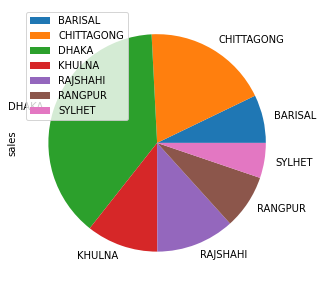

In [27]:
df.plot.pie(y='sales', x='division', figsize=(5, 5))

### PANDAS Techiques:
1. Filter
2. Drop
3. iloc, loc
4. Aggregate
5. Index
6. Column selection, copy, crop
7. Merge, Concate